# Data eurostatu
- Časová řada má kvartální frekvenci
- Časovou řadu si zobrazujeme pomocí pandas, ve kterém si připravíme dataset a následně ho vykreslíme pomocí matplotlib.pyplot, což je knihovna pro tvorbu grafů

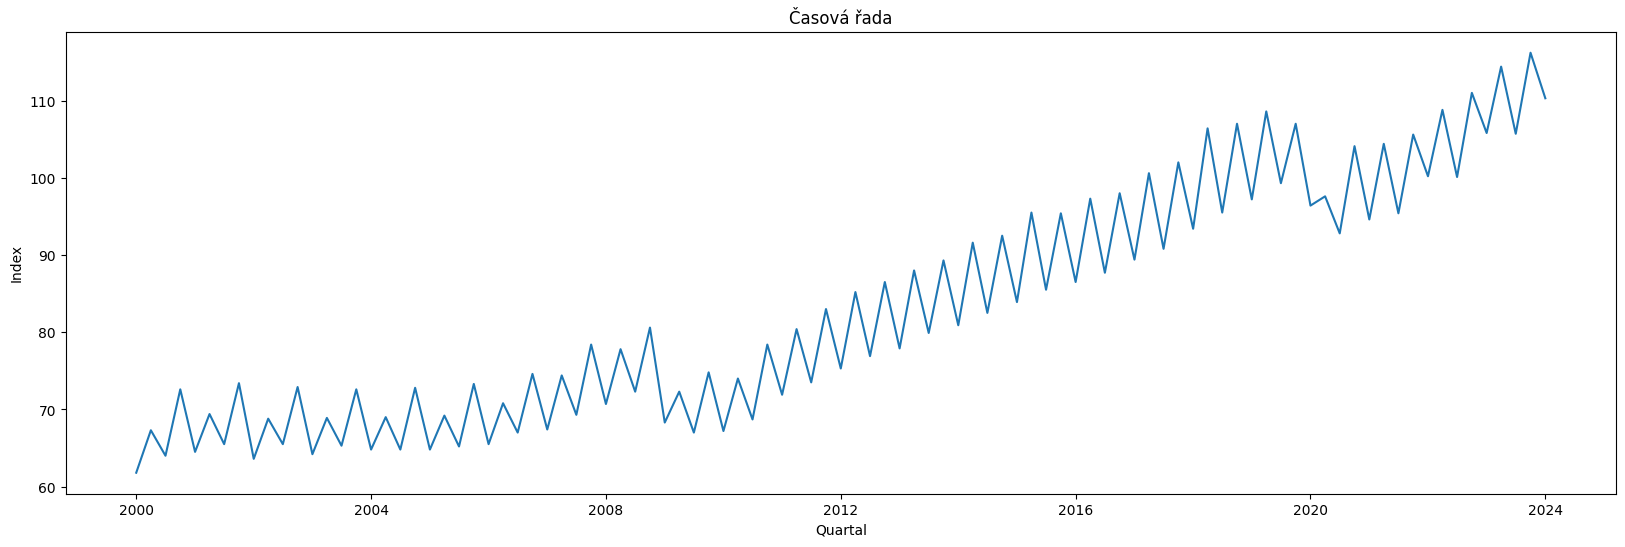

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Načtení dat z CSV souboru
data = pd.read_csv('ei_isind_q_linear.csv')

# Filtrování dat podle několika podmínek
filtered_data = data.loc[
    (data['unit'] == 'I21') & 
    (data['geo'] == 'DE') & 
    (data['s_adj'] == 'NSA') & 
    (data['indic_bt'] == 'WAGE') & 
    (data['nace_r2'] == 'C')
]

x = pd.to_datetime(filtered_data['TIME_PERIOD'])
y = filtered_data['OBS_VALUE']



plt.figure(figsize=(20, 6))
plt.ylabel('Index')
plt.xlabel('Quartal')
plt.title("Časová řada")
plt.plot(x,y)



# Dekompozice časové řady
- Dekompozice slouží k analýze časové řady
- Dekompozice je rozdělení časové řady na 4 složky
- Existují dva základní modely dekompozice
    - Aditivní -> 
        - Aditivní model je lineární a mění se konzistentně
    - Multiplikativní -> 
        - Multiplikativní model není lineární
- Časovou řadu rozkládáme na 3 nebo 4 složky:
    - Trendová složka
    - Cyklická složka (často zakomponuje do trendové složky)
    - Sezónní složka
    - Náhodná složka
- Dekompozice časové řady nám může pomoci k lepšímu pochopení časové řady
- Může nám pomoci při predikcích hodnot

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Převedení sloupce s časem na DATETIME
filtered_data['TIME_PERIOD'] = pd.to_datetime(filtered_data['TIME_PERIOD'])

# Nastavení sloupce s časem jako index
filtered_data.set_index('TIME_PERIOD', inplace=True)

# Ujistěte se, že data jsou seřazena podle času
filtered_data = filtered_data.sort_index()

# Výběr sloupce s hodnotami
data_values = filtered_data['OBS_VALUE']
# seasonal_decompose je funkce pro automatickou dekompozici časové řady,
# má dva modely - additive/multiplicative
dekompozice = seasonal_decompose(data_values, model="additive")

# Vizualizace dekompozice časové řady a residuí

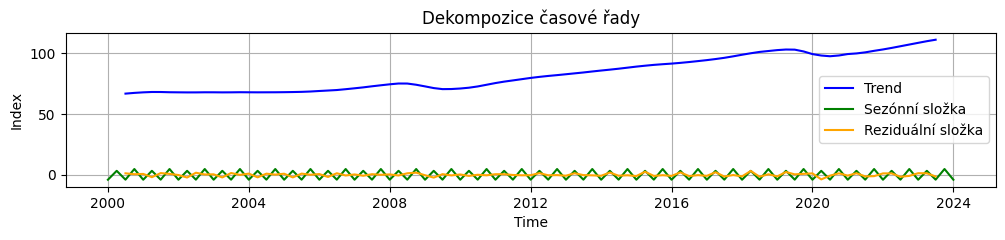

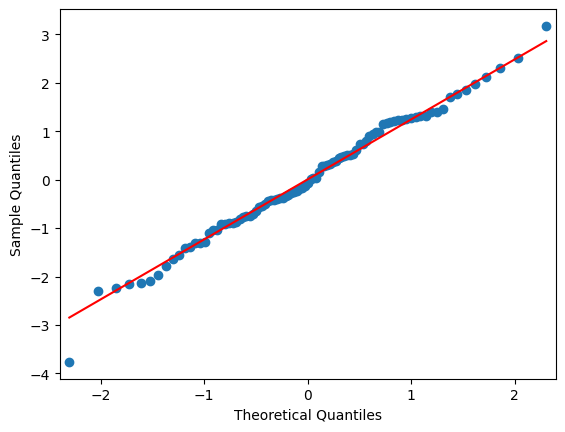

In [3]:
# Dekompozice
import statsmodels.api as sm

plt.figure(figsize=(12, 2))
plt.plot(dekompozice.trend, label='Trend', color='blue')
plt.plot(dekompozice.seasonal, label='Sezónní složka', color='green')
plt.plot(dekompozice.resid, label='Reziduální složka', color='orange')
plt.title('Dekompozice časové řady')
plt.ylabel('Index')
plt.xlabel('Time')
plt.grid(True)
plt.legend()

# Residua
residuals = dekompozice.resid.dropna()

sm.qqplot(residuals, line='s')
plt.show()

# Co jsou to Rezidua?
- Residua jsou náhodné variace nebo výkyvy, které zůstanou po odebrání trendu a sezónní složky
- Po odhalení residuí je lehčí porozumět chování a trendům časové řady
- Také pomáhá pro lepší predikci hodnot
- Vlastnosti:
    - Střední hodnota by měla být blízká nule, pokud je průměr daleko od nuly, může to naznačovat, že model špatně zachytil trend nebo sezónní složky
    - Rozptyl by měl být konstantní (homoskedasticita), pokud se rozptyl mění, nazýváme to heteroskedasticita, což může znamenat, že model nezachytil všechny důležité vzory
    - Normalita Rezidua by měla být přivližně normálně rozložena, pokud rezidua neodpovídají normálnímu rozdělení, může znamenat, že model není optimální nebo že jsou přitomny nějaké nelineární vztahy
- Jak s nimi pracovat?
    - Vizuální analýza -> Graf reziduí, QQ plot
    - Statistické testy:
        - Testy normality
        - Testy homoskedasticity

# Lineární regrese
- Lineární regrese je přímka, která hledá vztah mezi proměnnými
- Používá se pro predikci budoucích hodnot
- Yt = B0 + B1 * t
- Používáme funkce LinearRegression z balíčku sklearn.linear_model, pomocí kterého si vytvoříme model, který následně fitujeme a potom pomocí něho predikujeme hodnoty


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Filtrace dat
filtered_data = data.loc[
    (data['unit'] == 'I21') & 
    (data['geo'] == 'DE') & 
    (data['s_adj'] == 'NSA') & 
    (data['indic_bt'] == 'WAGE') & 
    (data['nace_r2'] == 'C')
]

# Převedení TIME_PERIOD na datetime a následně na číselné hodnoty (např. pořadové číslo dne)
filtered_data['TIME_PERIOD'] = pd.to_datetime(filtered_data['TIME_PERIOD'])
x = np.array(filtered_data['TIME_PERIOD'].map(pd.Timestamp.toordinal)).reshape((-1, 1))

# Vytvoření y jako OBS_VALUE
y = np.array(filtered_data['OBS_VALUE'])

# Lineární regrese
model = LinearRegression().fit(x, y)
r2 = model.score(x, y)
print(f"Determinační koeficient: {r2}")

y_pred = model.predict(x)

Determinační koeficient: 0.86012369474415


# Vizualizace predikce pomocí Lineární regrese

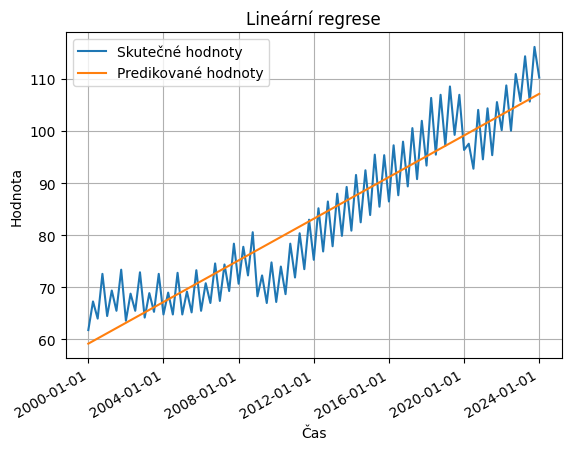

In [5]:
# Vytvoření grafu
plt.plot(filtered_data['TIME_PERIOD'], y, label='Skutečné hodnoty')
plt.plot(filtered_data['TIME_PERIOD'], y_pred, label='Predikované hodnoty')
plt.xlabel('Čas')
plt.ylabel('Hodnota')
plt.title('Lineární regrese')

# Nastavení formátu data na ose x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Automatické otáčení popisů na ose x

plt.legend()
plt.grid(True)
plt.show()

# Segmentace pomocí lineárni regrese
- Například pokud chceme zjistit změnu v časové řadě po nějaké události
- Získáme nový pohled na časovou řadu, kterou právě zkoumáme
- Segmentace se nehodí pokud časová řada má stálé chování a nemění se (např. pokud stále roste ve stejném sklonu)


## Segmentace

In [6]:
segments_definitions = [
    ('2006-01-01', '2008-12-31'),  # První segment
    ('2009-01-01', '2011-12-31'),  # Druhý segment
    ('2021-01-01', '2023-12-31'),  # Třetí segment
]


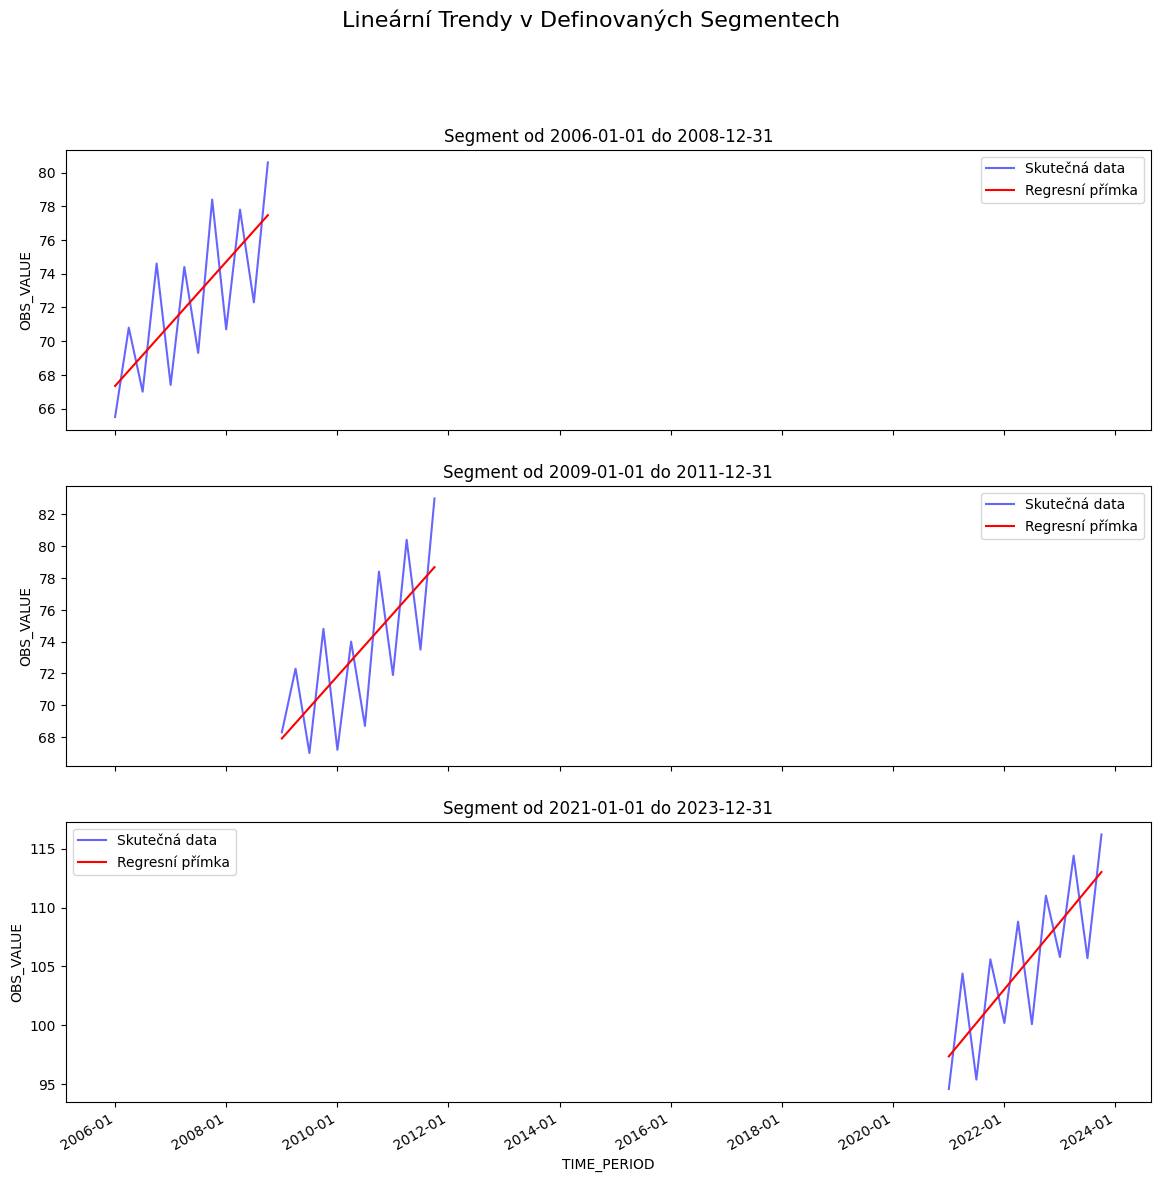

Sklon regresní přímky pro segment od 2006-01-01 do 2008-12-31: 0.010091219387122954
Sklon regresní přímky pro segment od 2009-01-01 do 2011-12-31: 0.0107349636728184
Sklon regresní přímky pro segment od 2021-01-01 do 2023-12-31: 0.015598839681416586


In [7]:
# Příprava grafu
fig, axs = plt.subplots(len(segments_definitions), 1, figsize=(14, 14), sharex=True)
fig.suptitle('Lineární Trendy v Definovaných Segmentech', fontsize=16)

# Výpis sklonů
slopes = []

for ax, (start_date, end_date) in zip(axs, segments_definitions):
    # Filtrace dat podle segmentu
    segment = filtered_data.loc[(filtered_data['TIME_PERIOD'] >= start_date) & (filtered_data['TIME_PERIOD'] <= end_date)]
    
    # Převedení na číselné hodnoty
    x_segment = np.array(segment['TIME_PERIOD'].map(pd.Timestamp.toordinal)).reshape((-1, 1))
    y_segment = np.array(segment['OBS_VALUE'])
    
    # Lineární regrese
    model_segment = LinearRegression().fit(x_segment, y_segment)
    y_pred_segment = model_segment.predict(x_segment)
    
    # Uložení sklonu
    slopes.append(model_segment.coef_[0])
    
    # Vykreslení dat a regresní přímky
    ax.plot(segment['TIME_PERIOD'], y_segment, label='Skutečná data', color='blue', alpha=0.6)
    ax.plot(segment['TIME_PERIOD'], y_pred_segment, color='red', label='Regresní přímka')
    ax.set_title(f'Segment od {start_date} do {end_date}')
    ax.set_ylabel('OBS_VALUE')
    ax.legend()

# Nastavení formátu osy x
axs[-1].set_xlabel('TIME_PERIOD')
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

# Zobrazení grafu
plt.show()

# Výpis sklonů
for (start_date, end_date), slope in zip(segments_definitions, slopes):
    print(f'Sklon regresní přímky pro segment od {start_date} do {end_date}: {slope}')

# Arima (AutoRegresive Integrated Moving Average)
- Statistická metoda, která se stala velmi populární pro její efektivitu při řešení mnoha standardních jevů, které se vyskytují v datech časové řady
- Tento model  analyzuje časovou řadu na základě AutoRegresivní složky, Integrační složky a složky klouzavých průměrů.
    - AutoRegresivní složka = Zkoumá vztah mezi pozorováním a předchozím nebo zpožděném pozorováním (kolik předchozích hodnot se bere v potaz při vysvětlování současné hodnoty)
    - Integrační složka = Diference čaové řady před aplikací modelů AR a/nebo MA (kolikrát po sobě se diference aplikuje)
    - Složka klouzavých průměrů = Vyjadřuje, že část chyby časové řady se dá vysvětlit jako lineární kombinace minulých chyb (z kolika časových intervalů v minulosti se chyby v modelu uplatní)
- Následně na základě analýzy předpovídá budoucí hodnoty
- Nevýhody:
    - Není vhodný pro časové řady, které obsahují sezónní jevy
- Modely ARIMA se odhadují tzv. Box-Jenkinsovou metodou
    1) Identifikace a výběř řádu modelu (p,d,q)
        - Využívá se analýzy autokorelací a parciálních autokorelací zkoumané časové řady
    2) Odhad regresních koeficientů (obvykle metodou "maximální věrohodnosti")
    3) Testování modelu, především stacionarity jeho reziduí 
        - Stacionarita časové řady znamená očištění od trendu a sezónních jevů, které ovlivňují regresní model
- Rovnice:
    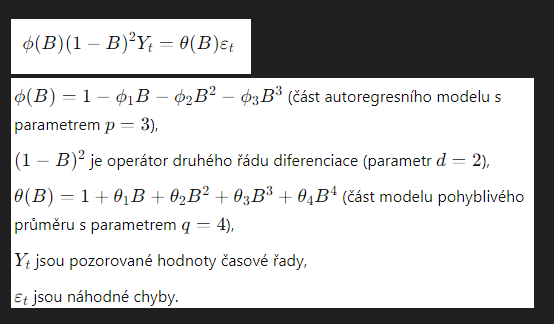

- Jaké má výstupní parametry?

### Autokorelace časové řady s různými zpožděními

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

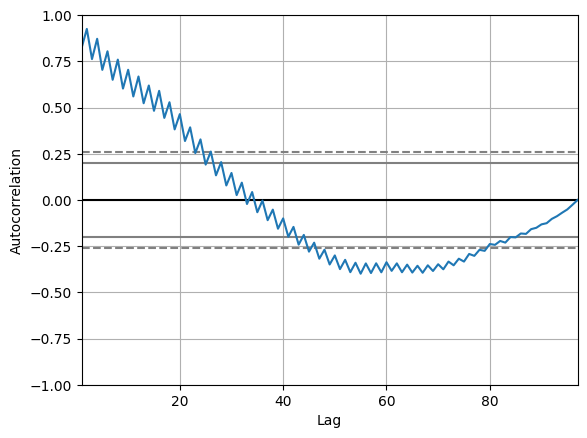

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Načtení dat
data = pd.read_csv('ei_isind_q_linear.csv')

# Filtrování dat podle několika podmínek
filtered_data = data.loc[
    (data['unit'] == 'I21') & 
    (data['geo'] == 'DE') & 
    (data['s_adj'] == 'NSA') & 
    (data['indic_bt'] == 'WAGE') & 
    (data['nace_r2'] == 'C')
]

# Převod TIME_PERIOD z formátu 'YYYY-Qn' na 'YYYY-MM'
def convert_quarter_to_month(quarter):
    year, q = quarter.split('-Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[q]
    return f'{year}-{month}'

filtered_data['TIME_PERIOD'] = filtered_data['TIME_PERIOD'].apply(convert_quarter_to_month)

# Převod na datetime
x = pd.to_datetime(filtered_data['TIME_PERIOD'])
y = filtered_data['OBS_VALUE']


# Autokorelační graf
pd.plotting.autocorrelation_plot(y)

### Využití ARIMA modelu

### A) Nastavení optimálních parametrů a vypsání detailu modelu
- Detail modelu zobrazuje použitý model, AIC, BIC a HQIC hodnoty a mnoho dalších ukazatelů 
- Vypsané jsou také výstupní koeficienty
- Následně je provedno několik statistických testů:
    - Ljung-Box test = Kontrola, zda v časové řadě existuje autokorelace
    - Heteroskedasticita = podmíněný rozptyl náhodné veličiny není konstantní (prvky mají různou variabilitu)
    - Další...
- Další věc, kterou zobrazuji je graf reziduí a jejich husota výskytu
- Poslední je krátký souhrn základních hodnot reziduí

C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

Best ARIMA order: (3, 2, 4) with AIC: 397.4205004850135
                               SARIMAX Results                                
Dep. Variable:              OBS_VALUE   No. Observations:                   97
Model:                 ARIMA(3, 2, 4)   Log Likelihood                -190.710
Date:                Thu, 12 Sep 2024   AIC                            397.421
Time:                        16:05:35   BIC                            417.852
Sample:                             0   HQIC                           405.676
                                 - 97                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0014      0.051    -19.654      0.000      -1.101      -0.902
ar.L2         -0.9675      0.070    -13.845      0.000      -1.104      -0.

C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


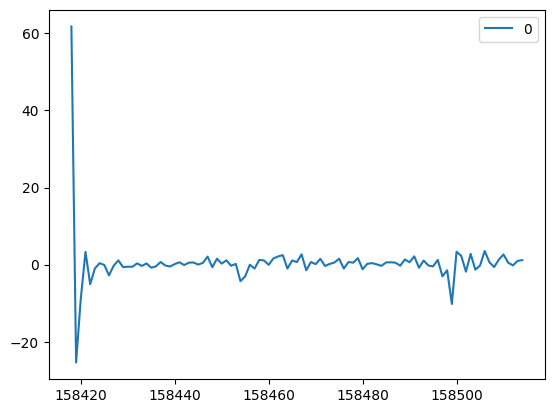

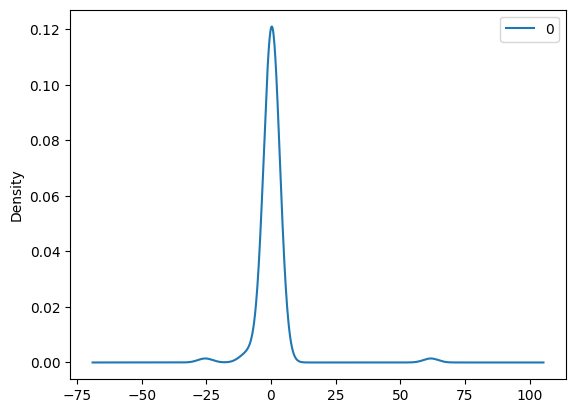

               0
count  97.000000
mean    0.414765
std     7.095879
min   -25.396474
25%    -0.489883
50%     0.261622
75%     1.078445
max    61.800000


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings


# Definujeme rozsahy pro p, d, q
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

# Funkce pro vyhledávání optimálních parametrů
def find_best_arima(y, p_values, d_values, q_values):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(y, order=(p,d,q))
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                        best_model = model_fit
                except:
                    continue
    
    print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')
    return best_model, best_order

# Hledání optimálních parametrů
best_model, best_order = find_best_arima(y, p_values, d_values, q_values)

# Zobrazení souhrnu nejlepšího modelu
print(best_model.summary())

# Rezidua modelu
residuals = pd.DataFrame(best_model.resid)
residuals.plot()
plt.show()

residuals.plot(kind="kde")
plt.show()

print(residuals.describe())

### b) Predikce pomocí ARIMA modelu

C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.655026, expected=108.600000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.807739, expected=99.300000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.543943, expected=107.000000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=98.149606, expected=96.400000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=107.613449, expected=97.600000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.192325, expected=92.800000
predicted=96.382351, expected=104.100000
predicted=99.400123, expected=94.600000
predicted=99.852539, expected=104.400000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=96.863288, expected=95.400000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.863074, expected=105.600000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=96.565782, expected=100.200000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.119628, expected=108.800000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.708988, expected=100.100000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.614478, expected=111.000000
predicted=103.049928, expected=105.800000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=113.896749, expected=114.400000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.927605, expected=105.700000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=115.128657, expected=116.200000


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.102410, expected=110.300000
Test RMSE: 3.839


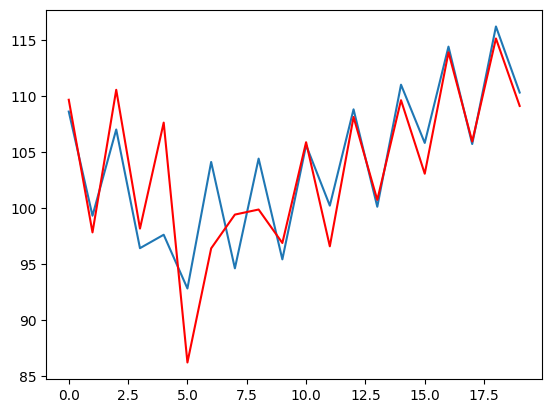

In [10]:
import math
from sklearn.metrics import mean_squared_error
X = y.values
size = int(len(X)*0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    model = (ARIMA(history, order=best_order))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = math.sqrt(mean_squared_error(test, predictions))
print("Test RMSE: %.3f"% rmse)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Využití SARIMA modelu
## Sarima (Seasonal AutoRegressive Integrated Moving Averages)
- Model, který je velmi používaný při predikci časových řad, zachycuje krátkodobé ale i dlouhodobé závislosti mezi daty, což z něho dělá velmi robustní nástroj pro predikce
- Používá se při modelování a předpovídání časových řad se sezónní složkou
- Složky:
    - Sezónní složka -> Opakující se jevy v datech na základě nějakého určitého intervalu 
    - Autoregresivní složka -> Vztah mezi aktuální hodnotou a předchozími hodnotami
        - Zachycuje autokorelaci časové řady
    - Integrační složka -> Diferencování, které přetváří časovou řadu na stacionární časovou řadu (počet diferencí k vytvoření stacionarity)
    - Složka klouzavých průměrů -> Závislost mezi aktuální hodnotou a předchozími a předchozími předpovězenými hodnotami 
- Matematické složky:
    - Autoregresivní složka -> Vyjadřuje vztah mezi aktuální hodnotou a určitým počtem zpožděných hodnot
    - Sezónní autoregresní složka -> Vyjadřuje vztah mezi aktuální hodnotou a určitým počtem zpožděných hodnot v sezóních intervalech
    - Nesezónní diferenční složka -> Slouží ke stacionaritě časové řady
    - Sezónní diferenční složka -> Slouží ke stacionaritě časové řady na základě hodnot v sezóních intervalech
    - Složka klouzavých průměrů -> Vyjadřuje vztah mezi aktuální hodnotou a residuálními chybami z modelu klouzavých průměrů aplikovaného na opožděné pozorování
    - Sezónní složka klouzavých průměrů -> Vyjadřuje vztah mezi aktuální hodnotou a residuálními chybami z modelu klouzavých průměrů aplikovaného na opožděné pozorování v sezóních intervalech
    - Náhodná složka
- Rovnice -> 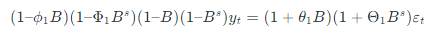
- SARIMA model je zaveden fitováním modelu historickými daty a následně je využívá pro predikci budoucích hodnot


### Důležité před nasazením SARIMA modelu
- SARIMA model předpokládá stacionaritu časové řady
    - Zda je časová řada stacionární můžeme zjistit pomocí testů:
        - ADF test
            - Pokud je p-hodnota menší než 0.05, tak časovou řadu považujeme za stacionární

### Připrava dat

C:\Users\tomik\AppData\Local\Temp\ipykernel_2468\1449906260.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['TIME_PERIOD'] = filtered_data['TIME_PERIOD'].apply(convert_quarter_to_month)


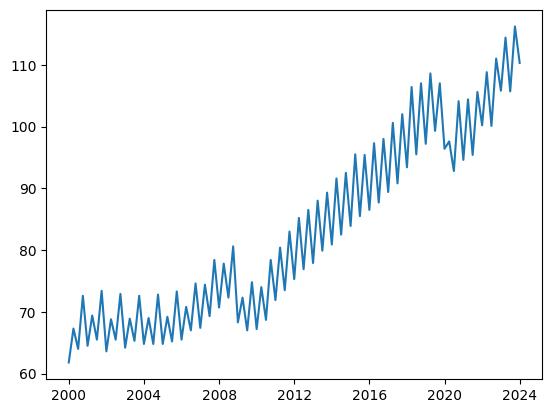

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Načtení dat
data = pd.read_csv('ei_isind_q_linear.csv')

# Filtrování dat podle několika podmínek
filtered_data = data.loc[
    (data['unit'] == 'I21') & 
    (data['geo'] == 'DE') & 
    (data['s_adj'] == 'NSA') & 
    (data['indic_bt'] == 'WAGE') & 
    (data['nace_r2'] == 'C')
]

# Převod TIME_PERIOD z formátu 'YYYY-Qn' na 'YYYY-MM'
def convert_quarter_to_month(quarter):
    year, q = quarter.split('-Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[q]
    return f'{year}-{month}'

filtered_data['TIME_PERIOD'] = filtered_data['TIME_PERIOD'].apply(convert_quarter_to_month)

# Převod na datetime
x = pd.to_datetime(filtered_data['TIME_PERIOD'])
y = filtered_data['OBS_VALUE']

plt.plot(x, y)

In [12]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries): 
    # Perform the Dickey-Fuller test 
    result = adfuller(timeseries.dropna(), autolag='AIC')  # Odstranění NaN hodnot pro test
    p_value = result[1] 
    print(f'ADF Statistic: {result[0]}') 
    print(f'p-value: {p_value}') 
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')

# Kontrola stacionarity původní a sezónně diferencované časové řady
check_stationarity(y)
#Netuším zda diferenci dělám správně 
y_seasonal_diff = y.diff(4).dropna()
check_stationarity(y_seasonal_diff)

ADF Statistic: 1.1844304414303375
p-value: 0.9958765271077188
Non-Stationary
ADF Statistic: -3.500482765135484
p-value: 0.007974704282929252
Stationary


### Zobrazení grafu Autokorelace a Parciální autokorelace
#### Autokorelace
- Měří vztah mezi aktuální hodnotou a předchozími hodnotami s různými zpožděními
#### Parciální autokorelace
- Představuje korelaci mezi datovým bodem a zpožděním při úpravě o vliv jiných zpoždění.

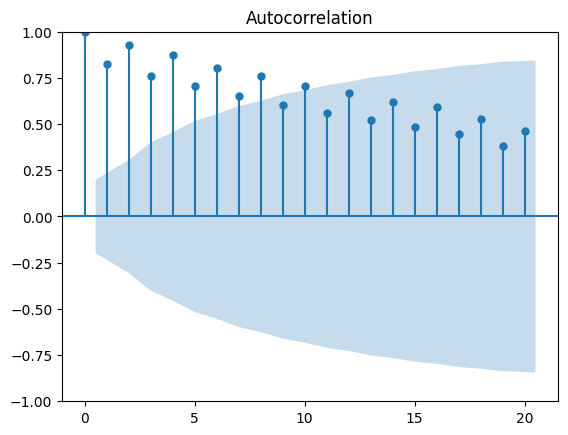

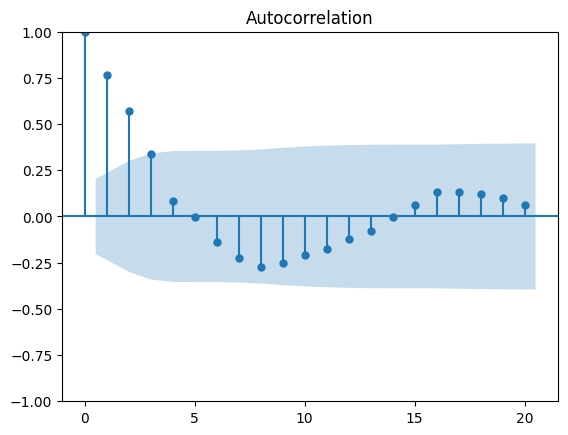

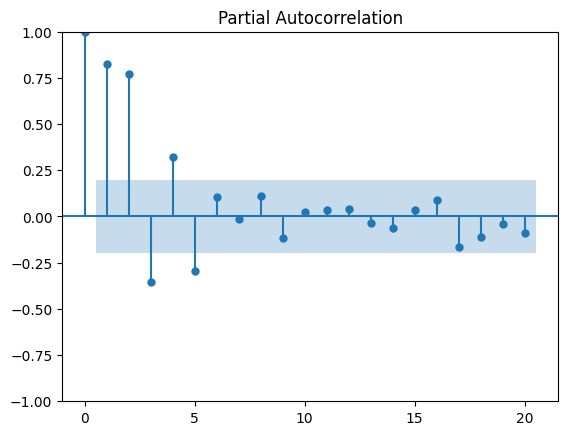

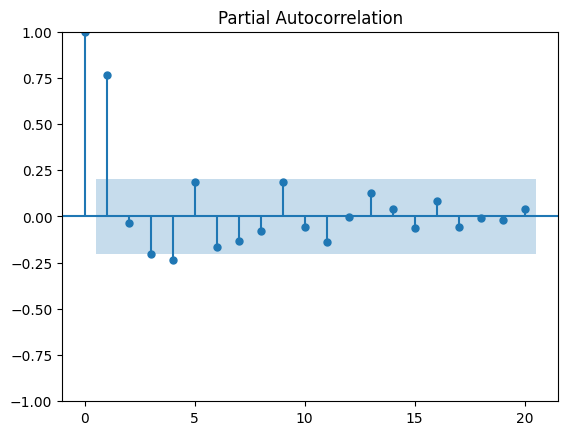

In [15]:
plot_acf(y)
plot_acf(y_seasonal_diff)
plt.show()
plot_pacf(y)
plot_pacf(y_seasonal_diff)
plt.show()
# Netuším jak z toho poznat správné parametry
# Netuším zda je to správně


#### Pokud je korealce mimo interval spolehlivosti (zabarvená plocha), znamená to, že je korealční koeficient statistický významný a není náhodný 

 ARIMA(1,2,0)(0,1,1)[4]          
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   77
Model:             SARIMAX(1, 2, 0)x(0, 1, [1], 4)   Log Likelihood                -120.672
Date:                             Fri, 13 Sep 2024   AIC                            247.344
Time:                                     00:11:04   BIC                            254.132
Sample:                                          0   HQIC                           250.044
                                              - 77                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5806      0.126     -4.616      0.000      -0.827      

C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


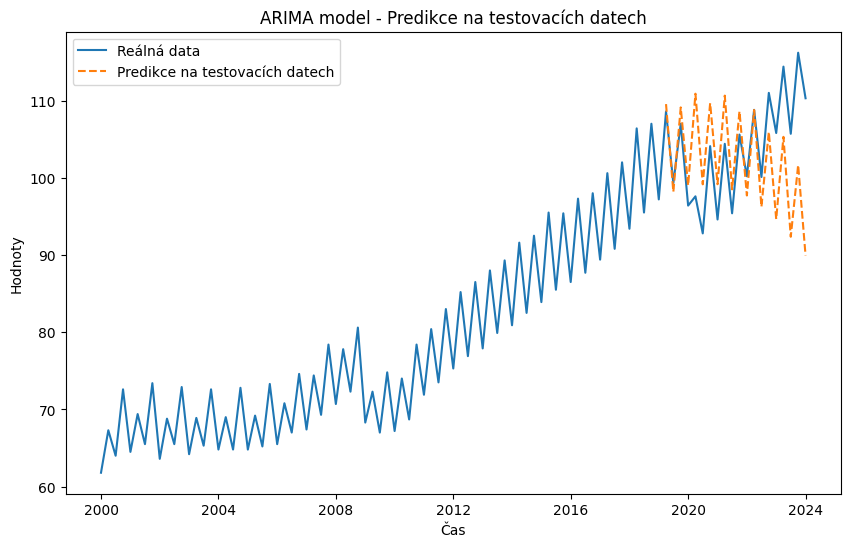

In [41]:
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split

# Předpokládám, že máš data 'x' a 'y' - například časovou řadu 'y'
# Rozdělení na trénovací a testovací sadu (80% trénovací, 20% testovací)
train_size = int(0.8 * len(y))
y_train, y_test = y[:train_size], y[train_size:]

# Vytvoření ARIMA modelu na trénovacích datech
model = auto_arima(y_train, d=2, m=4)
print(model)

# Shrnutí modelu
print(model.summary())

# Predikce na testovací sadě
n_periods = len(y_test)
forecast = model.predict(n_periods=n_periods)

# Vytvoření časové osy pro trénovací a testovací data
x_train = x[:train_size]
x_test = x[train_size:]

# Vizualizace reálných dat a predikce
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Reálná data')  # Původní data
plt.plot(x_test, forecast, label='Predikce na testovacích datech', linestyle='--')  # Predikce
plt.xlabel('Čas')
plt.ylabel('Hodnoty')
plt.legend()
plt.title('ARIMA model - Predikce na testovacích datech')
plt.show()

# Kroskorelace mezi řadami

- Co je to kroskorealce?
- K čemu se používá? 
- Jak funguje funkce statsmodels.tsa.stattools.ccf
    - co je parametr adjusted?
- Nejlepší zpoždění vychází na lag=3

C:\Users\tomik\AppData\Local\Temp\ipykernel_31808\1793602099.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_index = pd.to_datetime(DE_data['TIME_PERIOD'])


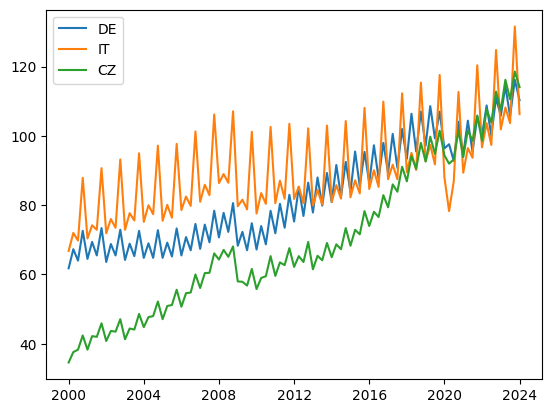

Kroskorelace CZ a DE: [ 0.95785578  0.88135368  0.90134216  0.83445408  0.85836157  0.7821012
  0.80567462  0.74354831  0.77300846  0.70210595  0.73114459  0.67239074
  0.70675641  0.64050022  0.66714167  0.60732411  0.64884528  0.57253629
  0.58966079  0.51057626  0.52631331  0.44058443  0.4491683   0.3700025
  0.38144911  0.29644938  0.30551136  0.22913398  0.24475434  0.16245011
  0.17269542  0.09825665  0.11458803  0.0365674   0.04988506 -0.02138164
 -0.00597353 -0.08833338 -0.08479303 -0.16326514 -0.1546614  -0.24140477
 -0.24157271 -0.32221841 -0.31432488 -0.40256129 -0.40824459 -0.48944679
 -0.48676807 -0.57493741 -0.57986431 -0.65860594 -0.65063384 -0.73642215
 -0.73705437 -0.80740531 -0.78593546 -0.85804208 -0.84880715 -0.91503589
 -0.88768343 -0.96794897 -0.98681965 -1.07830935 -1.08093877 -1.17649671
 -1.19637595 -1.28350614 -1.28072545 -1.36777961 -1.37489702 -1.45214244
 -1.42846704 -1.50310212 -1.50305487 -1.56514889 -1.52676806 -1.59215358
 -1.58782814 -1.63861465 -1.594

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("ei_isind_q_linear.csv")

# Filtrování dat podle několika podmínek
DE_data = data.loc[
    (data['unit'] == 'I21') & 
    (data['geo'] == 'DE') & 
    (data['s_adj'] == 'NSA') & 
    (data['indic_bt'] == 'WAGE') & 
    (data['nace_r2'] == 'C')
]

IT_data = data.loc[
    (data['unit'] == 'I21') & 
    (data['geo'] == 'IT') & 
    (data['s_adj'] == 'NSA') & 
    (data['indic_bt'] == 'WAGE') & 
    (data['nace_r2'] == 'C')
]

CZ_data = data.loc[
    (data['unit'] == 'I21') & 
    (data['geo'] == 'CZ') & 
    (data['s_adj'] == 'NSA') & 
    (data['indic_bt'] == 'WAGE') & 
    (data['nace_r2'] == 'C')
]


time_index = pd.to_datetime(DE_data['TIME_PERIOD'])

plt.plot(time_index, DE_data['OBS_VALUE'])
plt.plot(time_index, IT_data['OBS_VALUE'])
plt.plot(time_index, CZ_data['OBS_VALUE'])
plt.legend(["DE", "IT", "CZ"])
plt.show()

import statsmodels.api as sm

# Kroskorelace mezi CZ a DE
kroskorelace_cz_de = sm.tsa.stattools.ccf(CZ_data['OBS_VALUE'], DE_data['OBS_VALUE'], adjusted=True)
# Kroskorelace mezi DE a IT
kroskorelace_de_it = sm.tsa.stattools.ccf(DE_data['OBS_VALUE'], IT_data['OBS_VALUE'], adjusted=True)

kroskorelace_it_cz = sm.tsa.stattools.ccf(IT_data['OBS_VALUE'], CZ_data['OBS_VALUE'], adjusted=True)

print('Kroskorelace CZ a DE:', kroskorelace_cz_de)
print('Kroskorelace DE a IT:', kroskorelace_de_it)
print('Kroskorelace IT a CZ:', kroskorelace_it_cz)
# Korelace mezi třemi řadami pomocí Spearmanova koeficientu
corr_data = pd.DataFrame({
    'CZ': CZ_data['OBS_VALUE'].values,
    'DE': DE_data['OBS_VALUE'].values,
    'IT': IT_data['OBS_VALUE'].values
})

spearman_corr = corr_data.corr(method="spearman")
print("Spearmanova korelace:\n", spearman_corr)

1) 3 další čas. řady
    a) kroskorelace mezi řadami -> mám
        - Odhadnout z toho zpoždění -> mám
        - Lineární model mezi všemi řadami, najít koeficienty a spočítat p-hodnoty
        - Vyřazovat řady podle p-hodnot > 0.05
            - Kroková regrese
            - Manuální 
        - Zohlednit zpoždění
        - Vybrat správný lag a tím udělat optimální model
    b) Kontrola residuí modelu
        - Ljoung-box test
        - Autokorelační funkce
        - Zkontrolovat závislost residuí
        - Dát to autoarimy s regresory z bodu A
    c) Podívat se na modely, které jsem stvořil 
        - ARIMA
        - SARIMA
        - Optimální model z posledního úkolu